--- Πίνακας 5.1: Ενδεικτικές Μετρήσεις Γέφυρας Τετάρτου (SG1) ---


<>:61: SyntaxWarning: invalid escape sequence '\,'
<>:62: SyntaxWarning: invalid escape sequence '\,'
<>:62: SyntaxWarning: invalid escape sequence '\c'
<>:146: SyntaxWarning: invalid escape sequence '\,'
<>:154: SyntaxWarning: invalid escape sequence '\D'
<>:61: SyntaxWarning: invalid escape sequence '\,'
<>:62: SyntaxWarning: invalid escape sequence '\,'
<>:62: SyntaxWarning: invalid escape sequence '\c'
<>:146: SyntaxWarning: invalid escape sequence '\,'
<>:154: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-3927376725.py:61: SyntaxWarning: invalid escape sequence '\,'
  f"$\\mathbf{{Ευαισθησία\,(S_1):}}$ {S1_sensitivity:.4f} V/mm\n"
/tmp/ipython-input-3927376725.py:62: SyntaxWarning: invalid escape sequence '\,'
  f"$\\mathbf{{Τύπος\,Ευθείας:}}$ $V = {S1_slope:.3f} \cdot x + {S1_intercept:.3f}$"
/tmp/ipython-input-3927376725.py:62: SyntaxWarning: invalid escape sequence '\c'
  f"$\\mathbf{{Τύπος\,Ευθείας:}}$ $V = {S1_slope:.3f} \cdot x + {S1_intercept:.3f}$"
/tmp/ip

,ΤΑΝΣΗ ΕΞΟΔΟΥ (Vout)
ΕΝΔΕΙΞΗ ΜΙΚΡΟΜΕΤΡΟΥ (mm),
10.0,0.054
9.5,0.136
9.0,0.217
8.5,0.287
8.0,0.364
7.5,0.430
7.0,0.511
6.5,0.589
6.0,0.668


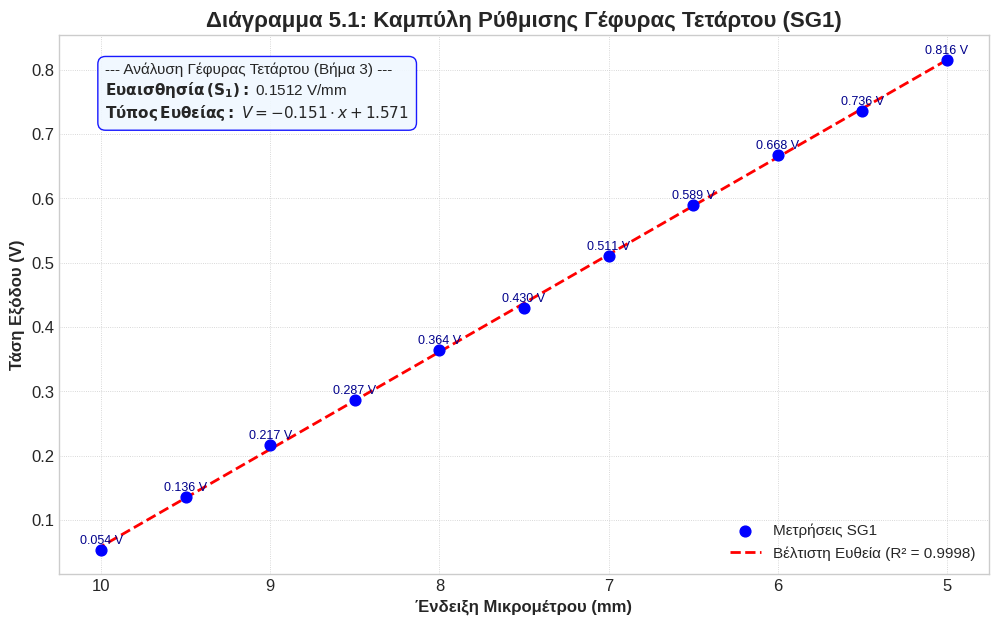



--- Πίνακας 5.2: Ενδεικτικές Μετρήσεις Γέφυρας Ημίσεος (SG1 & SG2) ---


,Vout (Κάμψη ↓),Vout (Επαναφορά ↑)
ΕΝΔΕΙΞΗ (mm),,
10.0,0.118,0.118
9.5,0.266,0.272
9.0,0.409,0.407
8.5,0.568,0.553
8.0,0.719,0.704
7.5,0.864,0.845
7.0,1.015,1.003
6.5,1.182,1.155
6.0,1.312,1.289


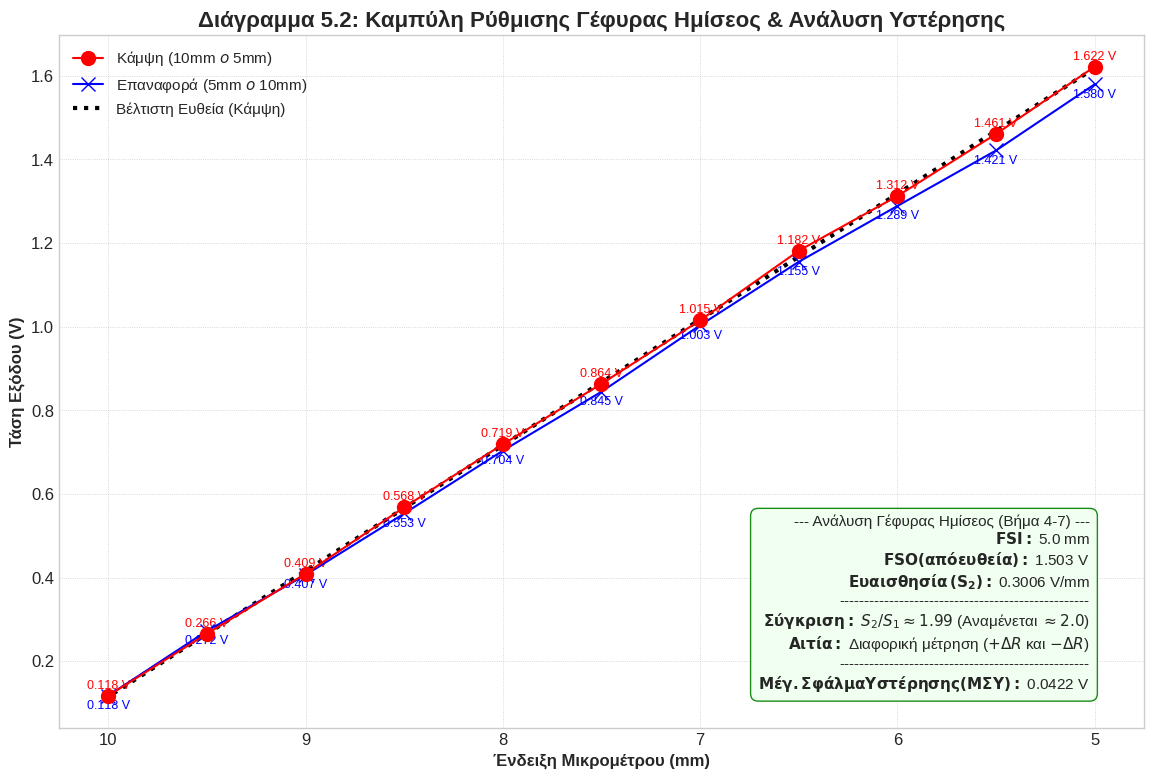

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# === Ρυθμίσεις για Όμορφες Γραφικές Παραστάσεις ===
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (12, 8),
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'figure.facecolor': 'white'
})

# ==============================================================
# ΜΕΡΟΣ 1: ΒΗΜΑ 3 - ΓΕΦΥΡΑ ΤΕΤΑΡΤΟΥ (SG1)
# ==============================================================

# --- 1.1 Ενδεικτικά Δεδομένα (Πίνακας 5.1) ---
x_displacement = np.linspace(10, 5, 11) # 10, 9.5, 9.0, ... , 5.0
v_out_q_bridge = (10 - x_displacement) * 0.15 + 0.05 + np.random.rand(11) * 0.02

df_q_bridge = pd.DataFrame({
    'ΕΝΔΕΙΞΗ ΜΙΚΡΟΜΕΤΡΟΥ (mm)': x_displacement,
    'ΤΑΝΣΗ ΕΞΟΔΟΥ (Vout)': v_out_q_bridge
})

print("--- Πίνακας 5.1: Ενδεικτικές Μετρήσεις Γέφυρας Τετάρτου (SG1) ---")
display(df_q_bridge.round(3).set_index('ΕΝΔΕΙΞΗ ΜΙΚΡΟΜΕΤΡΟΥ (mm)'))

# --- 1.2 Ανάλυση & Γράφημα (Διάγραμμα 5.1) ---
(S1_slope, S1_intercept,
 r_value_q, p_value_q, std_err_q) = stats.linregress(df_q_bridge['ΕΝΔΕΙΞΗ ΜΙΚΡΟΜΕΤΡΟΥ (mm)'],
                                                      df_q_bridge['ΤΑΝΣΗ ΕΞΟΔΟΥ (Vout)'])
S1_sensitivity = -S1_slope

plt.figure(figsize=(12, 7))
ax1 = plt.gca()

# Σχεδίαση σημείων (Η ax.scatter() δέχεται κανονικά το 's')
ax1.scatter(df_q_bridge['ΕΝΔΕΙΞΗ ΜΙΚΡΟΜΕΤΡΟΥ (mm)'], df_q_bridge['ΤΑΝΣΗ ΕΞΟΔΟΥ (Vout)'],
            color='b', marker='o', s=60, label='Μετρήσεις SG1', zorder=5)

# --- Προσθήκη ετικετών (annotations) ---
for i, row in df_q_bridge.iterrows():
    ax1.text(row['ΕΝΔΕΙΞΗ ΜΙΚΡΟΜΕΤΡΟΥ (mm)'], row['ΤΑΝΣΗ ΕΞΟΔΟΥ (Vout)'] + 0.005, # Μικρό offset
             f"{row['ΤΑΝΣΗ ΕΞΟΔΟΥ (Vout)']:.3f} V",
             fontsize=9, color='darkblue', ha='center', va='bottom')

# Σχεδίαση βέλτιστης ευθείας
x_line_q = np.array([5, 10])
y_line_q = S1_slope * x_line_q + S1_intercept
ax1.plot(x_line_q, y_line_q, color='r', linestyle='--', linewidth=2,
         label=f'Βέλτιστη Ευθεία (R² = {r_value_q**2:.4f})')

# --- 1.3 Infobox για Διάγραμμα 5.1 ---
# Διορθωμένη μορφοποίηση LaTeX
infobox_text_q = (
    f"--- Ανάλυση Γέφυρας Τετάρτου (Βήμα 3) ---\n"
    f"$\\mathbf{{Ευαισθησία\,(S_1):}}$ {S1_sensitivity:.4f} V/mm\n"
    f"$\\mathbf{{Τύπος\,Ευθείας:}}$ $V = {S1_slope:.3f} \cdot x + {S1_intercept:.3f}$"
)
ax1.text(0.05, 0.95, infobox_text_q,
         transform=ax1.transAxes,
         fontsize=11,
         verticalalignment='top',
         horizontalalignment='left',
         bbox=dict(boxstyle='round,pad=0.5', fc='aliceblue', ec='b', alpha=0.9))

# --- 1.4 Τίτλοι & Ετικέτες ---
ax1.set_title('Διάγραμμα 5.1: Καμπύλη Ρύθμισης Γέφυρας Τετάρτου (SG1)', fontsize=16)
ax1.set_xlabel('Ένδειξη Μικρομέτρου (mm)', fontsize=12)
ax1.set_ylabel('Τάση Εξόδου (V)', fontsize=12)
ax1.legend(loc='lower right', fontsize=11)
ax1.grid(True, which='both', linestyle=':', linewidth=0.6)
ax1.invert_xaxis() # Αντιστροφή άξονα Χ (10 -> 5)
plt.show()

print("\n" + "="*80 + "\n")

# ==============================================================
# ΜΕΡΟΣ 2: ΒΗΜΑΤΑ 4-7 - ΓΕΦΥΡΑ ΗΜΙΣΕΟΣ (SG1 & SG2)
# ==============================================================

# --- 2.1 Ενδεικτικά Δεδομένα (Πίνακας 5.2) ---
S2_sensitivity_approx = S1_sensitivity * 2
v_out_h_bend = (10 - x_displacement) * S2_sensitivity_approx + 0.1 + np.random.rand(11) * 0.03
v_out_h_release = v_out_h_bend * 0.97 + np.random.rand(11) * 0.02
v_out_h_release[0] = v_out_h_bend[0]

df_h_bridge = pd.DataFrame({
    'ΕΝΔΕΙΞΗ (mm)': x_displacement,
    'Vout (Κάμψη ↓)': v_out_h_bend,
    'Vout (Επαναφορά ↑)': v_out_h_release
})

print("--- Πίνακας 5.2: Ενδεικτικές Μετρήσεις Γέφυρας Ημίσεος (SG1 & SG2) ---")
display(df_h_bridge.round(3).set_index('ΕΝΔΕΙΞΗ (mm)'))

# --- 2.2 Ανάλυση (Βήματα 5 & 7) ---
(S2_slope, S2_intercept,
 r_value_h, p_value_h, std_err_h) = stats.linregress(df_h_bridge['ΕΝΔΕΙΞΗ (mm)'],
                                                      df_h_bridge['Vout (Κάμψη ↓)'])
S2_sensitivity = -S2_slope
FSI = 10.0 - 5.0
FSO = (S2_slope * 5.0 + S2_intercept) - (S2_slope * 10.0 + S2_intercept)
MSY_error = np.max(np.abs(df_h_bridge['Vout (Κάμψη ↓)'] - df_h_bridge['Vout (Επαναφορά ↑)']))

# --- 2.3 Σχεδίαση Γραφήματος 5.2 ---
plt.figure(figsize=(14, 9))
ax2 = plt.gca()

# --- ΔΙΟΡΘΩΣΗ 'AttributeError': Αλλαγή s=60 σε markersize=10 ---
# Σχεδίαση καμπύλης "Κάμψης"
ax2.plot(df_h_bridge['ΕΝΔΕΙΞΗ (mm)'], df_h_bridge['Vout (Κάμψη ↓)'],
         color='r', marker='o', markersize=10, label='Κάμψη (10mm $\to$ 5mm)', zorder=5)
# Σχεδίαση καμπύλης "Επαναφοράς"
ax2.plot(df_h_bridge['ΕΝΔΕΙΞΗ (mm)'], df_h_bridge['Vout (Επαναφορά ↑)'],
         color='b', marker='x', markersize=10, label='Επαναφορά (5mm $\to$ 10mm)', zorder=4)

# --- Προσθήκη ετικετών (annotations) ---
for i, row in df_h_bridge.iterrows():
    # Ετικέτες για Κάμψη (από πάνω)
    ax2.text(row['ΕΝΔΕΙΞΗ (mm)'], row['Vout (Κάμψη ↓)'] + 0.01,
             f"{row['Vout (Κάμψη ↓)']:.3f} V",
             fontsize=9, color='r', ha='center', va='bottom')
    # Ετικέτες για Επαναφορά (από κάτω)
    ax2.text(row['ΕΝΔΕΙΞΗ (mm)'], row['Vout (Επαναφορά ↑)'] - 0.01,
             f"{row['Vout (Επαναφορά ↑)']:.3f} V",
             fontsize=9, color='b', ha='center', va='top')

# Σχεδίαση βέλτιστης ευθείας (βάσει της κάμψης)
x_line_h = np.array([5, 10])
y_line_h = S2_slope * x_line_h + S2_intercept
ax2.plot(x_line_h, y_line_h, color='k', linestyle=':', linewidth=3,
         label=f'Βέλτιστη Ευθεία (Κάμψη)')

# --- 2.4 Προσθήκη Infobox με Αποτελέσματα ---

# --- ΔΙΟΡΘΩΣΗ 'ValueError': Διάσπαση f-string και LaTeX ---
# Δημιουργούμε τις γραμμές κειμένου ξεχωριστά για να αποφύγουμε σφάλματα parsing
line1 = f"--- Ανάλυση Γέφυρας Ημίσεος (Βήμα 4-7) ---\n"
line2 = f"$\\mathbf{{FSI:}}$ {FSI:.1f} mm\n"
line3 = f"$\\mathbf{{FSO (από ευθεία):}}$ {FSO:.3f} V\n"
line4 = f"$\\mathbf{{Ευαισθησία\,(S_2):}}$ {S2_sensitivity:.4f} V/mm\n"
line5 = f"--------------------------------------------------\n"
# Εδώ ήταν η προβληματική γραμμή. Τη σπάμε:
line6_text = r"$\mathbf{Σύγκριση:}$"
line6_math = f" $S_2 / S_1 \\approx {S2_sensitivity/S1_sensitivity:.2f}$"
line6_expect = r" (Αναμένεται $\approx 2.0$)"
line6 = line6_text + line6_math + line6_expect + "\n"
# --- Τέλος προβληματικής γραμμής ---
line7 = r"$\mathbf{Αιτία:}$" + " Διαφορική μέτρηση ($+\Delta R$ και $-\Delta R$)\n"
line8 = f"--------------------------------------------------\n"
line9 = f"$\\mathbf{{Μέγ. Σφάλμα Υστέρησης (ΜΣΥ):}}$ {MSY_error:.4f} V"

infobox_text_h = line1 + line2 + line3 + line4 + line5 + line6 + line7 + line8 + line9

# Τοποθέτηση Infobox
ax2.text(0.95, 0.05, infobox_text_h,
         transform=ax2.transAxes,
         fontsize=11,
         verticalalignment='bottom',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', fc='honeydew', ec='g', alpha=0.9))

# --- 2.5 Τίτλοι & Ετικέτες ---
ax2.set_title('Διάγραμμα 5.2: Καμπύλη Ρύθμισης Γέφυρας Ημίσεος & Ανάλυση Υστέρησης', fontsize=16)
ax2.set_xlabel('Ένδειξη Μικρομέτρου (mm)', fontsize=12)
ax2.set_ylabel('Τάση Εξόδου (V)', fontsize=12)
ax2.legend(loc='upper left', fontsize=11)
ax2.grid(True, which='both', linestyle=':', linewidth=0.6)
ax2.invert_xaxis() # Αντιστροφή άξονα Χ (10 -> 5)
plt.show()